<a href="https://colab.research.google.com/github/bakshitarun/python3/blob/main/tensorflow/RegressionTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


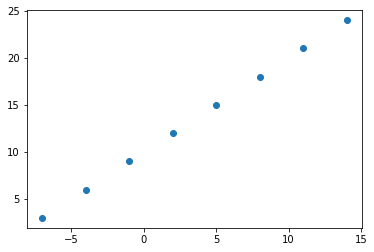

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Modeling in Tensorflow

tf.random.set_seed(42)

#1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) ])

#compile the model
model.compile(loss =tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),# stochastic gradient descent
             metrics = ['mae'])

#fit the model
model.fit(X,y, epochs = 5)


Epoch 1/5


ValueError: ignored

In [ ]:
model.predict([14])
#we may need to adjust the model parameters inorder to get better predictions

In [ ]:
#Improving our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#compile the model

model.compile(loss = tf.keras.losses.mae, optimizers =tf.keras.optimizers.Adam(lr=0.0001))

model.fit(X_train_full, y_train_full, epochs=100)